# END-SEMESTER EXAM


In [158]:
from lib.matrix import Matrix
from lib.linalg import power_iteration, norm
import numpy as np
from scipy.optimize import curve_fit
from lib.stats import (
    chi2,
)

import matplotlib.pyplot as plt

### Question 1

[1.08594453e+02 8.42063772e-03]
Observed data: 
[106  80  98  75  74  73  49  38  37  22]
Expected data: 
[107.68385805  95.70884955  84.35222612  74.34315724  65.52174475
  57.74706367  50.89491093  44.85582112  39.5333178   34.84237224]
Chi-square statistical value: 
15.958704778789617
Degrees of freedom: 
9
Critical value at 5% significance level: 
16.919
Fit is acceptable


/tmp/ipykernel_480526/1917238598.py:21: RuntimeWarning: overflow encountered in exp
  return n0 * np.exp(-lam*t)


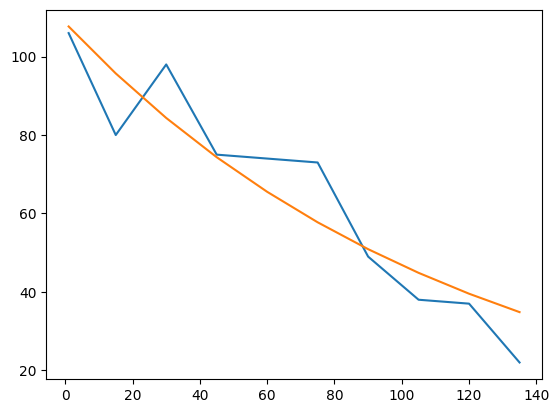

In [159]:
data = [
    [1, 106, 10],
    [15, 80, 9],
    [30, 98, 10],
    [45, 75, 9],
    [60, 74, 8],
    [75, 73, 8],
    [90, 49, 7],
    [105, 38, 6],
    [120, 37, 6],
    [135, 22, 5],
]

data = np.array(data)

t = data[:, 0]
counts = data[:, 1]
uncerts = data[:, 2]

def decay(t, n0, lam):
    return n0 * np.exp(-lam*t)

popt, pcov = curve_fit(decay, t, counts)

expected_counts = decay(t, popt[0], popt[1])



print(popt)

plt.plot(t, counts)
plt.plot(t, decay(t, popt[0], popt[1]))

print(f"Observed data: \n{counts}")

print(f"Expected data: \n{expected_counts}")

# Chi-square test
chi_square_statistical = chi2(counts, expected_counts)
print(f"Chi-square statistical value: \n{chi_square_statistical}")
# Degrees of freedom
df = len(t) - 1
print(f"Degrees of freedom: \n{df}")
# Critical value for 5% significance level
critical_at_5 = 16.919 # (from table)
print(f"Critical value at 5% significance level: \n{critical_at_5}")
# Check for null hypothesis
if chi_square_statistical < critical_at_5:
    print("Fit is acceptable")




### Question 2

In [160]:
def fixed_point(x0: float, tol: float, maxiter: int) -> float:
    """
    Find the root of a non-linear equation using the fixed point method.

    Parameters
    ----------
    func : Callable
        The function whose root is to be found.

    x0 : float
        The initial guess for the root.

    tol : float
        The tolerance for the root.

    maxiter : int
        The maximum number of iterations to perform.

    Returns
    -------
    float
        The root of the function.
    """

    def g(V):
        T = 300
        p = 5.95
        R = 0.0821
        a = 6.254
        b = 0.05422
        return b + V**2 / a * (p*b + R*T) - V**3 * p 

    x = x0
    for _ in range(maxiter):
        x_new = g(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    raise RuntimeError(
        "Failed to converge. Try increasing the maximum number of iterations."
    )

In [161]:

T = 300
p = 5.95
R = 0.0821
a = 6.254
b = 0.05422

In [162]:
sol = fixed_point(1e-4, 1e-6, 10000)
print(f"The volume of $Cl_2$ at P = {p} and temperature T = {T} is V = {sol}")

The volume of $Cl_2$ at P = 5.95 and temperature T = 300 is V = 0.07332630059944875


### Question 3

In the submitted answer sheet.

### Question 4

In the submitted answer sheet.

### Question 5

In [163]:
A = [[2, -1, -0, 0, 0], [-1,   2,  -1,   0,   0], [0,  -1,   2,  -1,   0], [0,   0,  -1,   2,  -1],
     [0 ,  0 ,  0,  -1,   2]]

A = Matrix.from_list(A)

In [164]:
max_eigval_A, sol_A = power_iteration(A)

print(f"Largest eigenvalue of A: {round(max_eigval_A, 4)}")
print(f"Corresponding eigenvector: {round(sol_A, 4)}")

Largest eigenvalue of A: 3.7321
Corresponding eigenvector: ([0.2889, -0.5, 0.5772, -0.5, 0.2889], double)


In [165]:
# Now using deflation to find next largest eigenvalue and eigenvector
def get_matrix_B(x):
    """
    Define C = V V^T matrix
    """
    n = len(x)
    B = Matrix(n, n)
    t1 = max_eigval_A/norm(x)
    for i in range(n):
        for j in range(n):
            B[i, j] = x[i] * x[j] * t1

    return B

B = get_matrix_B(sol_A)

B = A-B
max_eigval_B, sol_B = power_iteration(B)

print(f"Largest eigenvalue of B: {round(max_eigval_B, 4)}")
print(f"Corresponding eigenvector: {round(sol_B, 4)}")



Largest eigenvalue of B: 2.0
Corresponding eigenvector: ([0.5772, 0.0003, -0.5777, 0.0003, 0.5772], double)


### Question 6

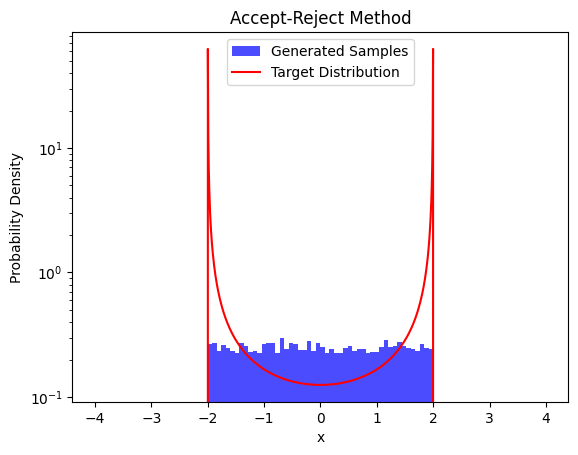

In [166]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target probability distribution function p(x)
def p(x):
    a = 2
    if abs(x) < a:
        return 0.5 / (a**2 - x**2)
    else:
        return 0

# Define the range of x
xmin = -4
xmax = 4

# Define the maximum value of p(x) over the range [xmin, xmax]
M = 0.5 / (a**2 - xmin**2)  # M is the maximum value of p(x) for |x| < a

# Number of samples to generate
num_samples = 10000

# Generate samples using Accept-Reject Method
samples = []
while len(samples) < num_samples:
    x = np.random.uniform(xmin, xmax)  # Generate a random number from the uniform proposal distribution
    u = np.random.uniform(0, M)  # Uniform random variable for acceptance
    if u <= p(x):
        samples.append(x)

# Plot the histogram of generated samples
plt.hist(samples, bins=50, density=True, alpha=0.7, color='blue', label='Generated Samples')

# Plot the target probability distribution function p(x)
x_vals = np.linspace(xmin, xmax, 1000)
p_vals = [p(x) for x in x_vals]
plt.plot(x_vals, p_vals, color='red', label='Target Distribution')

plt.title('Accept-Reject Method')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.yscale('log')
plt.legend()
plt.show()


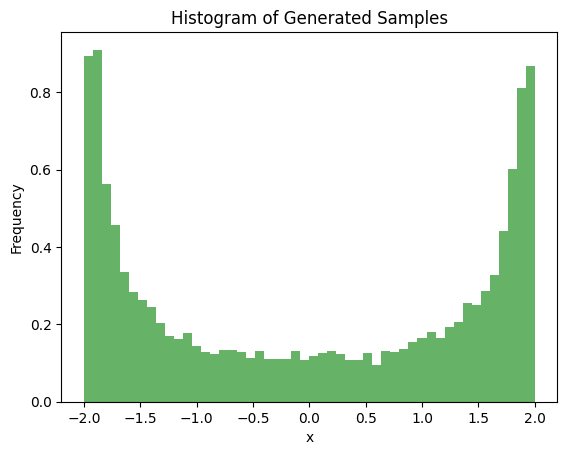

In [169]:
import numpy as np
import matplotlib.pyplot as plt

def pdf(x):
    """
    Define the probability density function (pdf) p(x).
    """
    a = 2
    if np.abs(x) < a:
        return 0.5 / (a**2 - x**2)
    else:
        return 0

def envelope(x):
    """
    Define the envelope function g(x).
    """
    # Choose an appropriate envelope function. For example, you can choose a constant or another function
    # that bounds p(x) from above.
    return 1.0  # A constant function that is greater than or equal to p(x)

def generate_sample(envelope):
    while True:
        # Step 2: Generate a random number from the distribution defined by the envelope function
        x = np.random.uniform(-2, 2)  # Assuming domain of x is -2 to 2 based on the provided pdf
        
        # Step 3: Generate another random number from a uniform distribution
        # between 0 and g(x)
        u = np.random.uniform(0, envelope(x))
        
        # Step 4: Accept or reject
        if u <= pdf(x):
            return x

# Generate samples
samples = [generate_sample(envelope) for _ in range(10000)]

# Plot histogram of generated samples
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of Generated Samples')
plt.show()


### Question 7

In [167]:
import numpy as np

def p(x, a):
    if abs(x) < a:
        return 0.5 / (a**2 - x**2)
    else:
        return 0

def kinetic_energy(x):
    return 0.5 * x**2

def potential_energy(x):
    return 0.5 * x**2

def metropolis(x, a, delta):
    x_new = x + np.random.uniform(-delta, delta)
    acceptance_ratio = (p(x_new, a) / p(x, a))**2
    if np.random.rand() < acceptance_ratio:
        return x_new
    else:
        return x

def variational_monte_carlo(a_values, num_steps, delta):
    energies = []
    for a in a_values:
        energy_sum = 0.0
        x = 0.0  # Initial position
        for _ in range(num_steps):
            x = metropolis(x, a, delta)
            energy_sum += (kinetic_energy(x) + potential_energy(x)) / p(x, a)
        energy_avg = energy_sum / num_steps
        energies.append(energy_avg)
    return energies

# Parameters
a_values = np.linspace(0.1, 2.0, 20)  # 20 equally spaced a-values
num_steps = 20000  # 20k Monte Carlo steps
delta = 1.0  # Step size for Metropolis algorithm

# Perform VMC
energies = variational_monte_carlo(a_values, num_steps, delta)

# Find the minimum energy and corresponding a-value
min_energy_index = np.argmin(energies)
min_energy = energies[min_energy_index]
min_a = a_values[min_energy_index]

print("Minimum energy:", min_energy)
print("Corresponding 'a' value:", min_a)


Minimum energy: 2.046496679699103e-06
Corresponding 'a' value: 0.1
